## Task B: Category Detection



In [6]:
%load_ext autoreload
%autoreload 2

from hatedetection import load_datasets
import glob
import json

train_dataset, dev_dataset, test_dataset = load_datasets(add_body=True)

evaluations = {
}


for model_name, glob_path in [
    ('no_context', "../evaluations/non-context-category*"),
    ('title', "../evaluations/context-category*"),
    ('title_only', "../evaluations/title-only-category*"),
    ('full_context', "../evaluations/title-body-category*"),
    ]:
    evaluations[model_name] = []
    for path in glob.glob(glob_path):
        with open(path) as f:
            obj = json.load(f)
            obj["file"] = path
            evaluations[model_name].append(obj)

for key, evals in evaluations.items():
    print(f"We have {len(evals)} {key} evaluations")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
We have 16 no_context evaluations
We have 16 title evaluations
We have 15 title_only evaluations
We have 15 full_context evaluations


In [8]:
evaluations["title_only"][0]["metrics"]

{'test_loss': 0.2886474295138914,
 'test_calls_f1': 0.2645011600928074,
 'test_women_f1': 0.4090909090909091,
 'test_lgbti_f1': 0.7272727272727273,
 'test_racism_f1': 0.8135964912280701,
 'test_class_f1': 0.5833333333333333,
 'test_politics_f1': 0.33109619686800895,
 'test_disabled_f1': 0.1456953642384106,
 'test_appearance_f1': 0.5748865355521936,
 'test_criminal_f1': 0.8175388967468176,
 'test_mean_f1': 0.5185568332672119,
 'test_mean_precision': 0.6584648489952087,
 'test_mean_recall': 0.4476359188556671,
 'test_runtime': 9.2424,
 'test_samples_per_second': 194.43}

In [17]:
import pandas as pd

metric_columns = [
    'calls_f1', 'women_f1', 'lgbti_f1', 'racism_f1',
    'class_f1', 'politics_f1', 'disabled_f1',
    'appearance_f1', 'criminal_f1', 'mean_f1',
    'mean_precision', 'mean_recall'    
]



dfs = []
for model_name, model_evaluations in evaluations.items():
    df = pd.DataFrame([
        {**{"file": evaluation["file"]}, **evaluation["metrics"]} for evaluation in model_evaluations
    ])

    df.columns = [x.split("_", 1)[1] if "_" in x else x for x in df.columns]

    without_dash = model_name.replace("_", " ")


    sub_df = df[metric_columns].copy()
    
    mean_df = pd.DataFrame({
            f"{without_dash} mean": sub_df[metric_columns].mean(), 
            f"{without_dash} std": sub_df[metric_columns].std()
        })
    dfs.append(mean_df)

result_df = pd.concat(dfs, axis=1)

result_df

no_context
title
title_only
full_context


no context mean  no context std  title mean  title std  \
calls_f1               0.784165        0.008949    0.801637   0.009916   
women_f1               0.652158        0.010933    0.672225   0.014997   
lgbti_f1               0.590471        0.017874    0.842527   0.020611   
racism_f1              0.862699        0.004899    0.942906   0.004489   
class_f1               0.593249        0.011060    0.726768   0.012011   
politics_f1            0.717805        0.014555    0.752979   0.007360   
disabled_f1            0.786369        0.015904    0.750196   0.028966   
appearance_f1          0.844621        0.004387    0.878756   0.009601   
criminal_f1            0.744453        0.008515    0.901019   0.007573   
mean_f1                0.730666        0.003954    0.807668   0.006250   
mean_precision         0.785975        0.004333    0.853147   0.006796   
mean_recall            0.686905        0.005748    0.769902   0.008000   

                title only mean  title only std  full context mean  \
calls_f1               0.264067        0.026894           0.804625   
women_f1               0.420005        0.026118           0.707943   
lgbti_f1               0.735198        0.055135           0.857255   
racism_f1              0.806326        0.015780           0.939455   
class_f1               0.565454        0.027976           0.741876   
politics_f1            0.326638        0.034031           0.771214   
disabled_f1            0.177033        0.085665           0.791217   
appearance_f1          0.552742        0.030870           0.891983   
criminal_f1            0.830198        0.011008           0.907254   
mean_f1                0.519740        0.014702           0.823647   
mean_precision         0.662951        0.020882           0.851308   
mean_recall            0.446418        0.013394           0.799804   

                full context std  
calls_f1                0.016978  
women_f1                0.016711  
lgbti_f1                0.011824  
racism_f1               0.007488  
class_f1                0.014109  
politics_f1             0.011506  
disabled_f1             0.015026  
appearance_f1           0.009970  
criminal_f1             0.007939  
mean_f1                 0.005682  
mean_precision          0.006470  
mean_recall             0.007102

In [19]:
def print_mean(row, context, ):
    mean = row[context + " mean"]
    std = row[context + " std"]
    return f"${mean:.3f} \pm {std:.3f}$"

display_df = pd.DataFrame()

for context, model_name in [
    ("title only", "BERT Title only"),
    ("no context", "BERT No Context"),
    ("title", "BERT Title"), 
    ("full context", "BERT Title+Body"), 
    ]:
    display_df[model_name] = result_df.apply(lambda x: print_mean(x, context), axis=1)



display_df["metrics"] = display_df.index.map(lambda x: " ".join([y.capitalize() for y in x.split("_")]))

display_df.reset_index(inplace=True)
del display_df["index"]
display_df.set_index("metrics", inplace=True)

#display_df = display_df.T[["Mean F1"]]

display_df

BERT Title only    BERT No Context         BERT Title  \
metrics                                                                   
Calls F1        $0.264 \pm 0.027$  $0.784 \pm 0.009$  $0.802 \pm 0.010$   
Women F1        $0.420 \pm 0.026$  $0.652 \pm 0.011$  $0.672 \pm 0.015$   
Lgbti F1        $0.735 \pm 0.055$  $0.590 \pm 0.018$  $0.843 \pm 0.021$   
Racism F1       $0.806 \pm 0.016$  $0.863 \pm 0.005$  $0.943 \pm 0.004$   
Class F1        $0.565 \pm 0.028$  $0.593 \pm 0.011$  $0.727 \pm 0.012$   
Politics F1     $0.327 \pm 0.034$  $0.718 \pm 0.015$  $0.753 \pm 0.007$   
Disabled F1     $0.177 \pm 0.086$  $0.786 \pm 0.016$  $0.750 \pm 0.029$   
Appearance F1   $0.553 \pm 0.031$  $0.845 \pm 0.004$  $0.879 \pm 0.010$   
Criminal F1     $0.830 \pm 0.011$  $0.744 \pm 0.009$  $0.901 \pm 0.008$   
Mean F1         $0.520 \pm 0.015$  $0.731 \pm 0.004$  $0.808 \pm 0.006$   
Mean Precision  $0.663 \pm 0.021$  $0.786 \pm 0.004$  $0.853 \pm 0.007$   
Mean Recall     $0.446 \pm 0.013$  $0.687 \pm 0.006$  $0.770 \pm 0.008$   

                  BERT Title+Body  
metrics                            
Calls F1        $0.805 \pm 0.017$  
Women F1        $0.708 \pm 0.017$  
Lgbti F1        $0.857 \pm 0.012$  
Racism F1       $0.939 \pm 0.007$  
Class F1        $0.742 \pm 0.014$  
Politics F1     $0.771 \pm 0.012$  
Disabled F1     $0.791 \pm 0.015$  
Appearance F1   $0.892 \pm 0.010$  
Criminal F1     $0.907 \pm 0.008$  
Mean F1         $0.824 \pm 0.006$  
Mean Precision  $0.851 \pm 0.006$  
Mean Recall     $0.800 \pm 0.007$

In [15]:
print(display_df.to_latex(escape=False, longtable=False))

\begin{tabular}{llll}
\toprule
{} &    BERT No Context &         BERT Title &    BERT Title+Body \\
metrics        &                    &                    &                    \\
\midrule
Calls F1       &  $0.784 \pm 0.009$ &  $0.802 \pm 0.010$ &  $0.805 \pm 0.017$ \\
Women F1       &  $0.652 \pm 0.011$ &  $0.672 \pm 0.015$ &  $0.708 \pm 0.017$ \\
Lgbti F1       &  $0.590 \pm 0.018$ &  $0.843 \pm 0.021$ &  $0.857 \pm 0.012$ \\
Racism F1      &  $0.863 \pm 0.005$ &  $0.943 \pm 0.004$ &  $0.939 \pm 0.007$ \\
Class F1       &  $0.593 \pm 0.011$ &  $0.727 \pm 0.012$ &  $0.742 \pm 0.014$ \\
Politics F1    &  $0.718 \pm 0.015$ &  $0.753 \pm 0.007$ &  $0.771 \pm 0.012$ \\
Disabled F1    &  $0.786 \pm 0.016$ &  $0.750 \pm 0.029$ &  $0.791 \pm 0.015$ \\
Appearance F1  &  $0.845 \pm 0.004$ &  $0.879 \pm 0.010$ &  $0.892 \pm 0.010$ \\
Criminal F1    &  $0.744 \pm 0.009$ &  $0.901 \pm 0.008$ &  $0.907 \pm 0.008$ \\
Mean F1        &  $0.731 \pm 0.004$ &  $0.808 \pm 0.006$ &  $0.824 \pm 0.006$ \\


## Roc CURVES

In [16]:
an_eval = evaluations["no_context"][0]

[{'predictions': [[-5.356539249420166,
    -0.07465710490942001,
    1.0462608337402344,
    -4.8483710289001465,
    -4.931524753570557,
    -4.185081958770752,
    -3.5462112426757812,
    -3.141270637512207,
    -4.814491271972656],
   [-4.205047130584717,
    -3.4706170558929443,
    -4.270700454711914,
    5.747738361358643,
    -2.5811522006988525,
    -2.604290008544922,
    -4.692417144775391,
    -3.8833820819854736,
    -2.799125909805298],
   [-4.495261192321777,
    -1.4418874979019165,
    -3.4267165660858154,
    -4.098460674285889,
    -3.940469980239868,
    -3.1902668476104736,
    2.985028028488159,
    -2.521226406097412,
    -4.172216415405273],
   [-5.5788493156433105,
    -0.7929666638374329,
    -2.950958728790283,
    -3.2604100704193115,
    -5.428046703338623,
    -0.2533890902996063,
    -5.594562530517578,
    -3.0618042945861816,
    -4.994447231292725],
   [-3.9822585582733154,
    -2.492178201675415,
    -4.014911651611328,
    -4.0749125480651855,
    -3

In [ ]:
import torch 
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

data = []

auc_scores = {
    "None": [],
    "Hyphen": [],
    "Title+Body": [],
}

for context, evals in [
    ("None", evaluations["no_context"]), 
    ("Title", evaluations["title"]),
    #("Hyphen", evaluations["hyphen"]),
    ("Title+Body", evaluations["full_context"])]:

    for i, evaluation in enumerate(evals): 
        y_score = torch.softmax(torch.Tensor(evaluation["predictions"]), dim=1)[:, 1]
        y_true = torch.Tensor(evaluation["labels"])
        fpr, tpr, _ = roc_curve(y_true, y_score)
        
        score = roc_auc_score(y_true, y_score)
        auc_scores[context].append(score)

        this_points = []

        x_interp = np.arange(0, 1, 5e-3)
        y_interp = np.interp(x_interp, xp=fpr, fp=tpr)
        for x, y in zip(x_interp, y_interp):
            this_points.append({
                "fpr": x,
                "tpr": y,
                "context": context,
                "i": i,  
            })

        data += this_points

auc_scores = {k: np.array(v) for k, v in auc_scores.items()}

#plt.plot(fpr, tpr, color='darkorange',  lw=2)


#fpr, tpr, _ = roc_curve(y_true, y_score)

#plt.plot(fpr, tpr, color='blue', lw=2)

df = pd.DataFrame(data)

auc_scores

#

## Plot

In [83]:
data

context variable     value
129        none    LGBTI  0.551020
132        none    LGBTI  0.573171
140        none    LGBTI  0.574074
226        none    CLASS  0.577947
131        none    LGBTI  0.578616
..          ...      ...       ...
156       title   RACISM  0.946281
169       title   RACISM  0.947368
165       title   RACISM  0.947585
145  title+body   RACISM  0.948905
157       title   RACISM  0.953464

[423 rows x 3 columns]

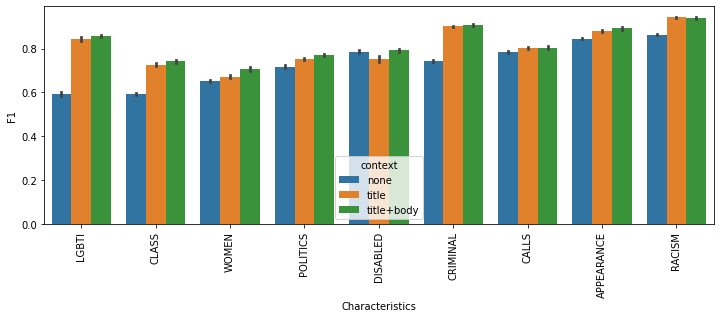

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

df_full_context_evals["context"] = "title+body"

df_context_evals["context"] = "title"
df_no_context_evals["context"] = "none"

metrics = [
    'eval_calls_f1', 'eval_women_f1', 'eval_lgbti_f1', 'eval_racism_f1',
    'eval_class_f1', 'eval_politics_f1', 'eval_disabled_f1',
    'eval_appearance_f1', 'eval_criminal_f1'
]

columns = metrics + ["context"]

df = pd.concat([df_full_context_evals[columns], df_context_evals[columns], df_no_context_evals[columns]])

data = df.melt(id_vars=["context"], value_vars=metrics)

data["variable"] = data["variable"].apply(lambda x: x.split("_")[1].upper())

data = data.sort_values("value")

plt.figure(figsize=(12, 4))
sns.barplot(data=data, x="variable", y="value", hue="context")

plt.xticks(rotation=90)
plt.ylabel("F1")
plt.xlabel("Characteristics")


plt.savefig("imgs/task_b_scores.png")